In [1]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

import pandas as pd
import os
import numpy as np
import glob
import scipy

from mpl_toolkits.mplot3d import Axes3D
# import ROOT
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

import re

import matplotlib.ticker as mticker
from scipy.stats import norm

In [2]:
##### folder name
uni = "pid_1_128_8_128_200_7_20250116"  

##### load prediction result
path = "/home/chyoo/work/KNO_reconstruction/KNO_reconstruction/result_*/"+uni +"/"+uni +".csv"
pred_path = glob.glob(path)
pred_list = [file for file in pred_path if file.endswith(".csv")]
df = pd.read_csv(pred_list[0])


##### load energy label
path_name = "/home/chyoo/work/KNO_reconstruction/KNO_reconstruction/result_*/"+uni +"/name_"+uni +".csv"
pred_path_name = glob.glob(path_name)
pred_list_name = [file for file in pred_path_name if file.endswith(".csv")]
df2 = pd.read_csv(pred_list_name[0])

In [3]:
pred = np.array(df['prediction']).reshape(-1,1)
label = np.array(df['label']).reshape(-1,1)
fname = np.array(df2['fname']).reshape(-1,1)


In [4]:
#### extract energy label
pattern = re.compile(r'(\d+)MeV')
fnames = []
for row in fname:
    name = row[0] if isinstance(row, (list, np.ndarray)) else row
    match = pattern.search(name)
    if match:
        fnames.append(match.group(1))  
fnames = np.array(fnames, dtype=int)


In [5]:
def calculate_efficiency(pred_label_0, pred_label_1, thresholds):
    efficiencies = {}
    for threshold in thresholds:
        eff_key_check = f"ele_eff_mu_{int(threshold*1000)}_miss_id_check"
        eff_key = f"ele_eff_mu_{int(threshold*1000)}_miss_id"
        cut_value = np.sort(pred_label_1)[int(len(pred_label_1) * (1-threshold))]
        
        efficiencies[eff_key_check] = np.mean(pred_label_1 < cut_value)
        efficiencies[eff_key] = np.mean(pred_label_0 < cut_value)
        
        rej_key_check = f"mu_rej_ele_{int(threshold*1000)}_miss_id_check"
        rej_key = f"mu_rej_ele_{int(threshold*1000)}_miss_id"
        cut_value = np.sort(pred_label_0)[int(len(pred_label_0) * (threshold))]
        
        efficiencies[rej_key_check] = np.mean(pred_label_0 < cut_value)
        efficiencies[rej_key] = np.mean(pred_label_1 < cut_value)
        
    return efficiencies

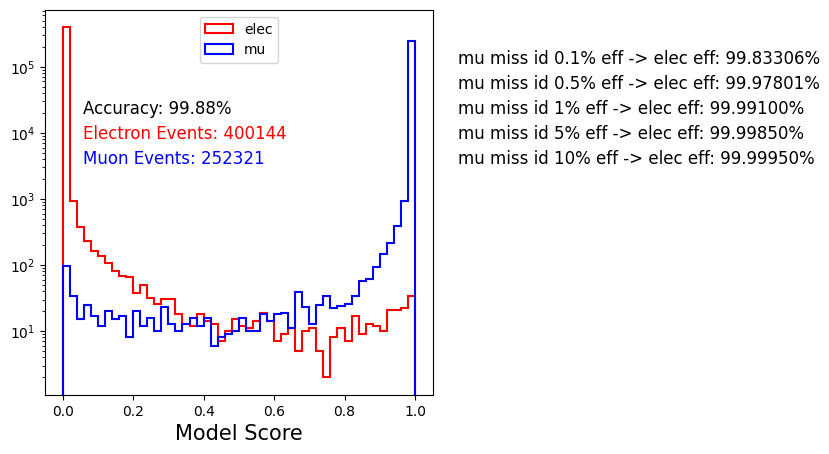

In [6]:
label0 = "elec"
label1 = "mu"

plt.rcParams['figure.figsize'] = (5, 5)
# plt.hist(pred[label==0],bins=50,histtype='step',color='red',linewidth=1.5,label=label0)
# plt.hist(pred[label==1],bins=50,histtype='step',color='blue',linewidth=1.5,label=label1)
plt.hist(pred[label==0],bins=50,histtype='step',color='red',linewidth=1.5,label=label0)
plt.hist(pred[label==1],bins=50,histtype='step',color='blue',linewidth=1.5,label=label1)
plt.legend(loc='upper center')
plt.yscale('log')


acc = (((pred[(label==1)]>0.5).sum()+(pred[(label==0)]<0.5).sum())/pred.shape[0])*100
mu_events = pred[(label==1)].shape[0]
elec_events = pred[(label==0)].shape[0]


pred_label_0 = pred[label == 0]
pred_label_1 = pred[label == 1]



thresholds = [0.999, 0.995, 0.99, 0.95, 0.90]
efficiencies = calculate_efficiency(pred_label_0, pred_label_1, thresholds)

# for key, value in efficiencies.items():
#     print(f"{key}: {value}")

plt.figtext(0.2, 0.70, f'Accuracy: {acc:.2f}%', horizontalalignment='left', verticalalignment='top', fontsize=12, color='black')
plt.figtext(0.2, 0.65, f'Electron Events: {elec_events}', horizontalalignment='left', verticalalignment='top', fontsize=12, color='red')
plt.figtext(0.2, 0.60, f'Muon Events: {mu_events}', horizontalalignment='left', verticalalignment='top', fontsize=12, color='blue')


plt.figtext(0.95, 0.80, str(label1)+' miss id 0.1% eff -> elec eff: '+f'{(100*(efficiencies["ele_eff_mu_999_miss_id"])):.5f}%', horizontalalignment='left', verticalalignment='top', fontsize=12, color='black')
plt.figtext(0.95, 0.75, str(label1)+' miss id 0.5% eff -> elec eff: '+f'{(100*(efficiencies["ele_eff_mu_995_miss_id"])):.5f}%', horizontalalignment='left', verticalalignment='top', fontsize=12, color='black')
plt.figtext(0.95, 0.70, str(label1)+' miss id 1% eff -> elec eff: '+f'{(100*(efficiencies["ele_eff_mu_990_miss_id"])):.5f}%', horizontalalignment='left', verticalalignment='top', fontsize=12, color='black')
plt.figtext(0.95, 0.65, str(label1)+' miss id 5% eff -> elec eff: '+f'{(100*(efficiencies["ele_eff_mu_950_miss_id"])):.5f}%', horizontalalignment='left', verticalalignment='top', fontsize=12, color='black')
plt.figtext(0.95, 0.60, str(label1)+' miss id 10% eff -> elec eff: '+f'{(100*(efficiencies["ele_eff_mu_900_miss_id"])):.5f}%', horizontalalignment='left', verticalalignment='top', fontsize=12, color='black')



# plt.figtext(0.95, 0.50, 'elec 99.9% eff -> '+str(label1)+' rej:'+ f'{(100*(1-efficiencies["mu_rej_ele_999_miss_id"])):.5f}%', horizontalalignment='left', verticalalignment='top', fontsize=12, color='black')
# plt.figtext(0.95, 0.45, 'elec 99.5% eff -> '+str(label1)+' rej:'+ f'{(100*(1-efficiencies["mu_rej_ele_995_miss_id"])):.5f}%', horizontalalignment='left', verticalalignment='top', fontsize=12, color='black')
# plt.figtext(0.95, 0.40, 'elec 99% eff -> '+str(label1)+' rej:'+ f'{(100*(1-efficiencies["mu_rej_ele_990_miss_id"])):.5f}%', horizontalalignment='left', verticalalignment='top', fontsize=12, color='black')
# plt.figtext(0.95, 0.35, 'elec 95% eff -> '+str(label1)+' rej:'+ f'{(100*(1-efficiencies["mu_rej_ele_950_miss_id"])):.5f}%', horizontalalignment='left', verticalalignment='top', fontsize=12, color='black')
# plt.figtext(0.95, 0.30, 'elec 90% eff -> '+str(label1)+' rej:'+ f'{(100*(1-efficiencies["mu_rej_ele_900_miss_id"])):.5f}%', horizontalalignment='left', verticalalignment='top', fontsize=12, color='black')




plt.xlabel('Model Score',fontsize=15)

plt.show()

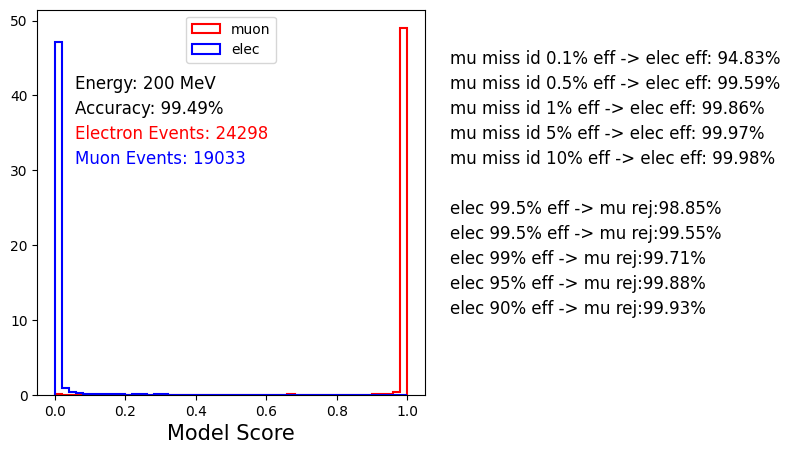

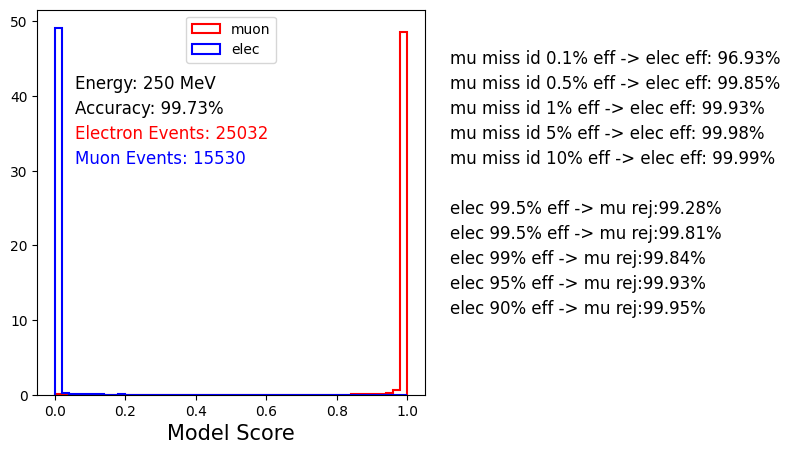

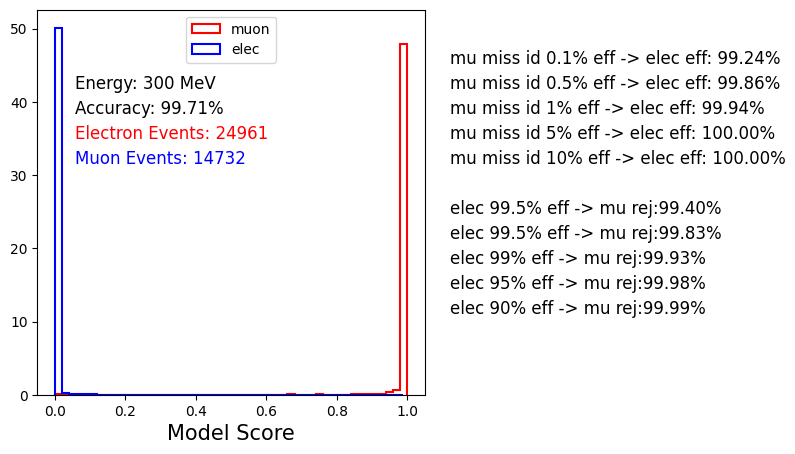

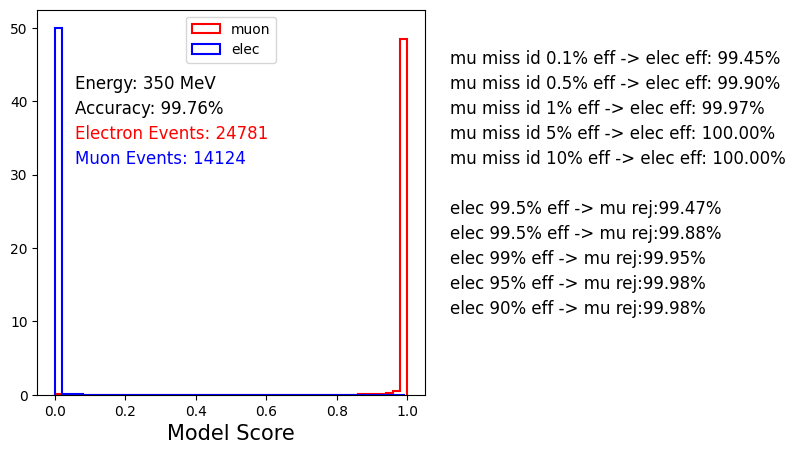

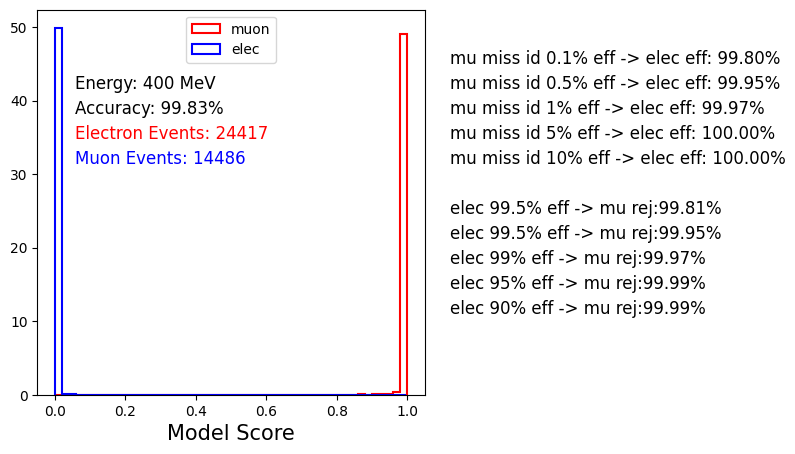

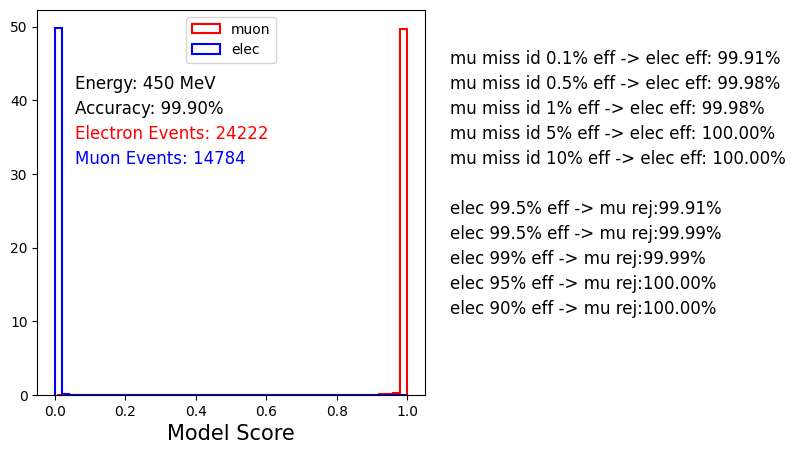

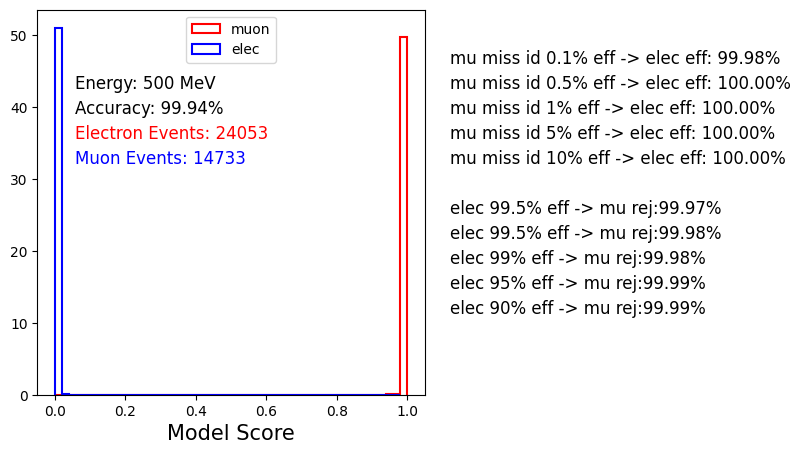

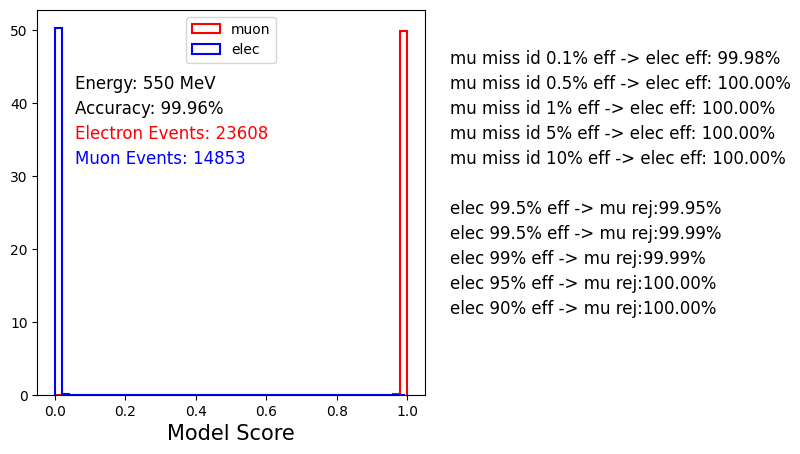

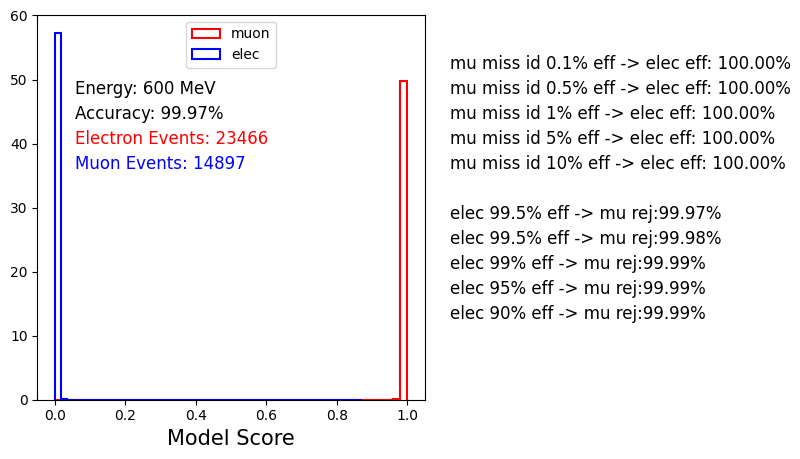

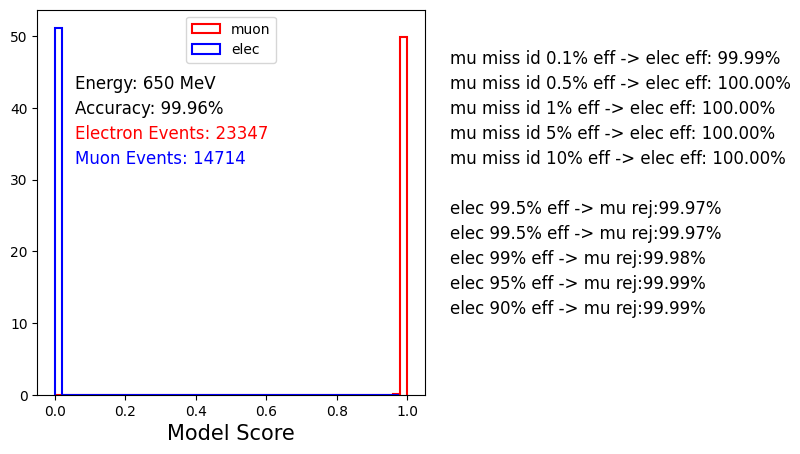

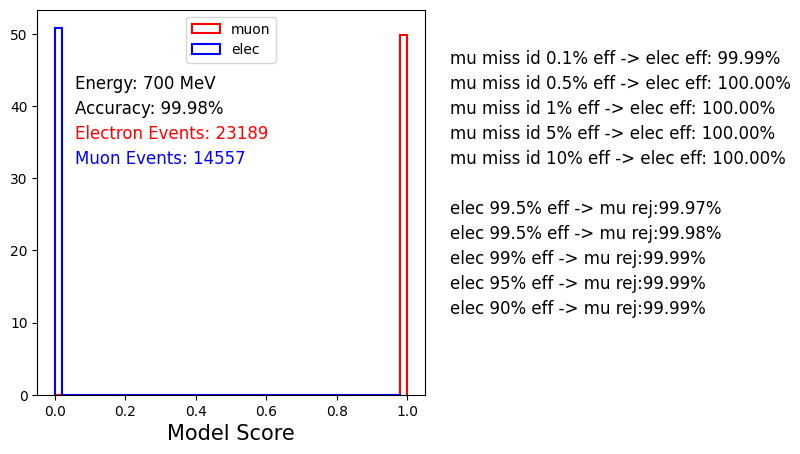

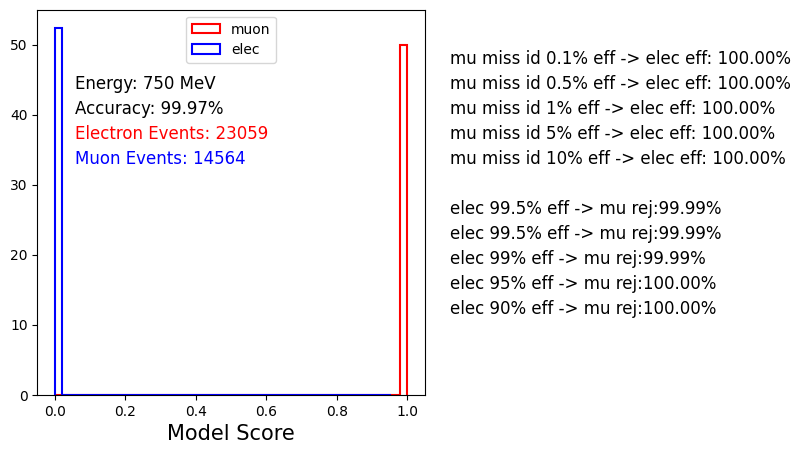

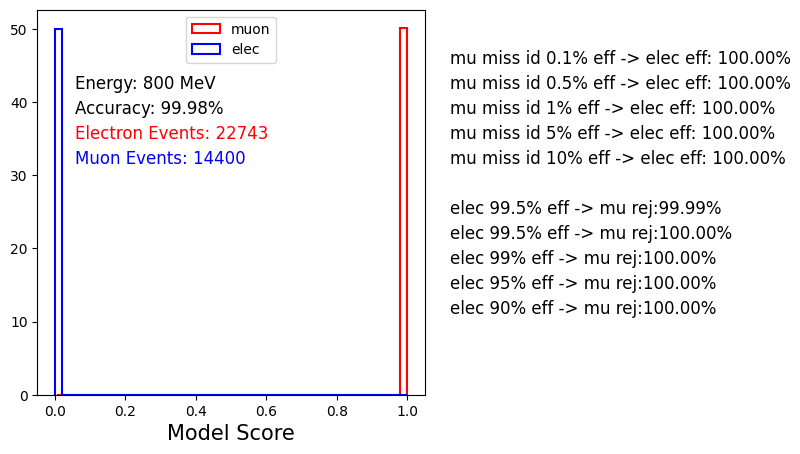

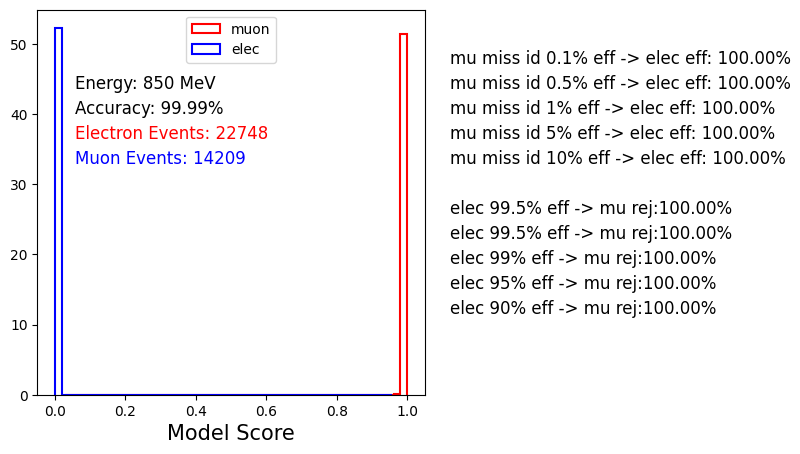

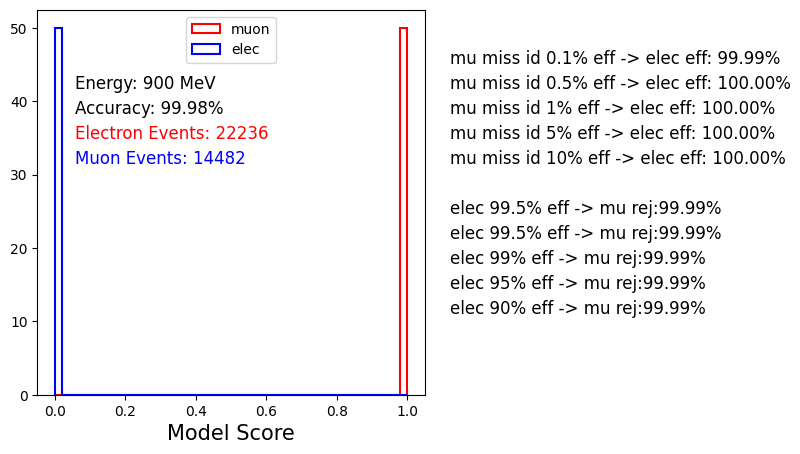

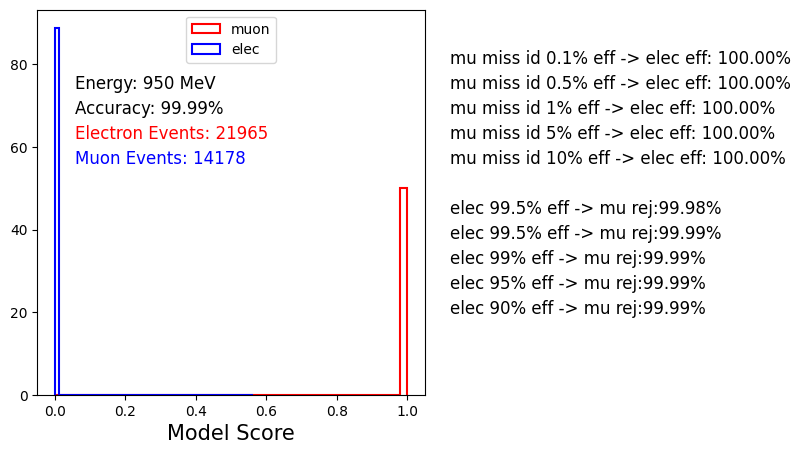

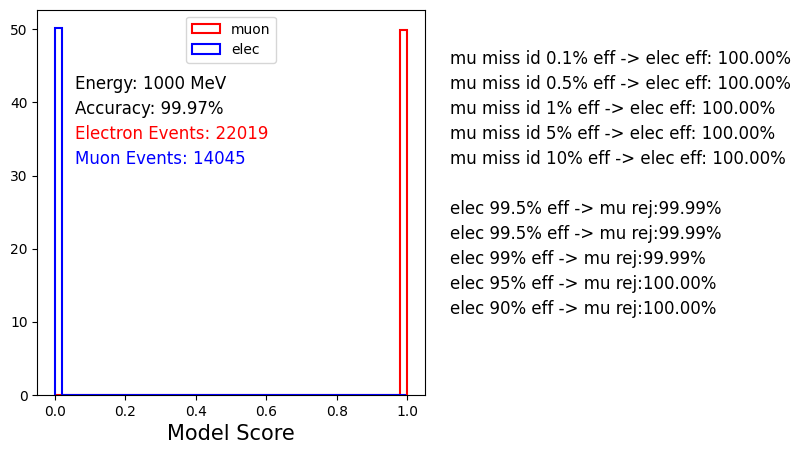

In [7]:
energy_s = []
acc_s = []
mu_missid_05 = []
elec_995 = []
mu_missid_01 = []
elec_999 = []

mu_missid_5 = []
elec_95 = []

# label0 = "pi0"
label0 = "elec"
for energy in range(200,1050,50):
    
    pred_energy = pred[fnames==energy]
    label_energy = label[fnames==energy]
    
    plt.rcParams['figure.figsize'] = (5, 5)
    plt.hist(pred_energy[label_energy==1],bins=50,density=True,histtype='step',color='red',linewidth=1.5,label='muon')
    plt.hist(pred_energy[label_energy==0],bins=50,density=True,histtype='step',color='blue',linewidth=1.5,label=label0)
    plt.legend(loc='upper center')
    acc = (((pred_energy[label_energy==1]>0.5).sum()+(pred_energy[label_energy==0]<0.5).sum())/pred[fnames==energy].shape[0])*100
    elec_events = pred_energy[label_energy==0].shape[0]
    mu_events = pred_energy[label_energy==1].shape[0]

    pred_label_0 = pred_energy[label_energy==0]
    pred_label_1 = pred_energy[label_energy==1]



    thresholds = [0.999, 0.995, 0.99, 0.95, 0.90]
    efficiencies = calculate_efficiency(pred_label_0, pred_label_1, thresholds)

    # for key, value in efficiencies.items():
    #     print(f"{key}: {value}")
    
    plt.figtext(0.2, 0.75, f'Energy: {energy} MeV', horizontalalignment='left', verticalalignment='top', fontsize=12, color='black')
    plt.figtext(0.2, 0.70, f'Accuracy: {acc:.2f}%', horizontalalignment='left', verticalalignment='top', fontsize=12, color='black')
    plt.figtext(0.2, 0.65, f'Electron Events: {elec_events}', horizontalalignment='left', verticalalignment='top', fontsize=12, color='red')
    plt.figtext(0.2, 0.60, f'Muon Events: {mu_events}', horizontalalignment='left', verticalalignment='top', fontsize=12, color='blue')


    plt.figtext(0.95, 0.80, str(label1)+' miss id 0.1% eff -> elec eff: '+f'{(100*(efficiencies["ele_eff_mu_999_miss_id"])):.2f}%', horizontalalignment='left', verticalalignment='top', fontsize=12, color='black')

    plt.figtext(0.95, 0.75, str(label1)+' miss id 0.5% eff -> elec eff: '+f'{(100*(efficiencies["ele_eff_mu_995_miss_id"])):.2f}%', horizontalalignment='left', verticalalignment='top', fontsize=12, color='black')
    plt.figtext(0.95, 0.70, str(label1)+' miss id 1% eff -> elec eff: '+f'{(100*(efficiencies["ele_eff_mu_990_miss_id"])):.2f}%', horizontalalignment='left', verticalalignment='top', fontsize=12, color='black')
    plt.figtext(0.95, 0.65, str(label1)+' miss id 5% eff -> elec eff: '+f'{(100*(efficiencies["ele_eff_mu_950_miss_id"])):.2f}%', horizontalalignment='left', verticalalignment='top', fontsize=12, color='black')
    plt.figtext(0.95, 0.60, str(label1)+' miss id 10% eff -> elec eff: '+f'{(100*(efficiencies["ele_eff_mu_900_miss_id"])):.2f}%', horizontalalignment='left', verticalalignment='top', fontsize=12, color='black')


    plt.figtext(0.95, 0.50, 'elec 99.5% eff -> '+str(label1)+' rej:'+ f'{(100*(1-efficiencies["mu_rej_ele_999_miss_id"])):.2f}%', horizontalalignment='left', verticalalignment='top', fontsize=12, color='black')

    plt.figtext(0.95, 0.45, 'elec 99.5% eff -> '+str(label1)+' rej:'+ f'{(100*(1-efficiencies["mu_rej_ele_995_miss_id"])):.2f}%', horizontalalignment='left', verticalalignment='top', fontsize=12, color='black')
    plt.figtext(0.95, 0.40, 'elec 99% eff -> '+str(label1)+' rej:'+ f'{(100*(1-efficiencies["mu_rej_ele_990_miss_id"])):.2f}%', horizontalalignment='left', verticalalignment='top', fontsize=12, color='black')
    plt.figtext(0.95, 0.35, 'elec 95% eff -> '+str(label1)+' rej:'+ f'{(100*(1-efficiencies["mu_rej_ele_950_miss_id"])):.2f}%', horizontalalignment='left', verticalalignment='top', fontsize=12, color='black')
    plt.figtext(0.95, 0.30, 'elec 90% eff -> '+str(label1)+' rej:'+ f'{(100*(1-efficiencies["mu_rej_ele_900_miss_id"])):.2f}%', horizontalalignment='left', verticalalignment='top', fontsize=12, color='black')


    plt.xlabel('Model Score',fontsize=15)

    energy_s.append(energy)
    acc_s.append(acc)
    mu_missid_01.append(100*(efficiencies["ele_eff_mu_999_miss_id"]))
    elec_999.append(100*(1-efficiencies["mu_rej_ele_999_miss_id"]))

    mu_missid_05.append(100*(efficiencies["ele_eff_mu_995_miss_id"]))
    elec_995.append(100*(1-efficiencies["mu_rej_ele_995_miss_id"]))
    
    mu_missid_5.append(100*(efficiencies["ele_eff_mu_950_miss_id"]))
    elec_95.append(100*(1-efficiencies["mu_rej_ele_950_miss_id"]))
    # plt.ylabel('Num Events',fontsize=15)
    plt.show()

In [8]:
energy_events = []
for energy in range(200,1050,50):
    elec_events = pred[(label==1)&(fname==energy)].shape[0]
    mu_events = pred[(label==0)&(fname==energy)].shape[0]
    # print(elec_events+mu_events)
    energy_events.append(elec_events+mu_events)

    # stop

In [9]:
std_error = np.sqrt((np.array(acc_s)/100 * (1 - np.array(acc_s)/100)) / np.array(energy_events)) * 100

/tmp/ipykernel_399232/2139134494.py:1: RuntimeWarning: divide by zero encountered in divide
  std_error = np.sqrt((np.array(acc_s)/100 * (1 - np.array(acc_s)/100)) / np.array(energy_events)) * 100


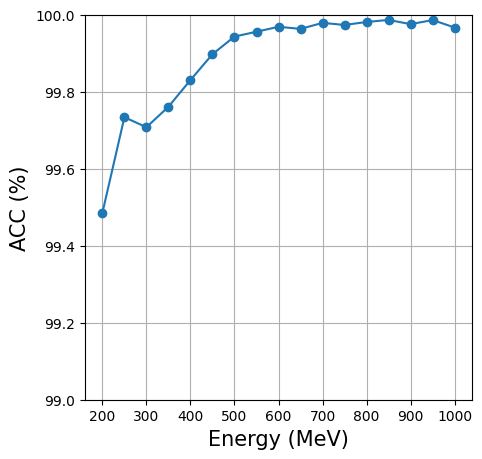

In [10]:
plt.errorbar(np.array(energy_s), np.array(acc_s), yerr=std_error, fmt='o-', capsize=2, capthick=2)
plt.xlabel("Energy (MeV)", fontsize=15)
plt.ylabel("ACC (%)", fontsize=15)
plt.grid()
plt.ylim([99, 100])
plt.show()

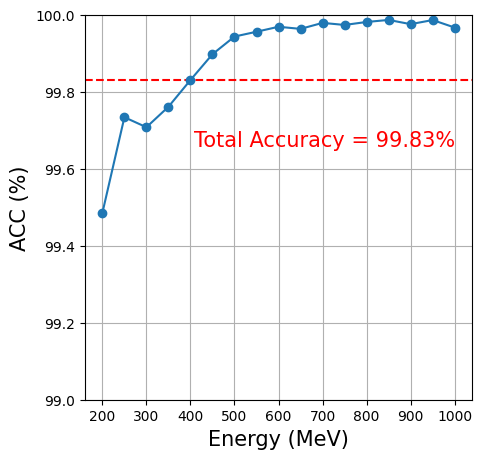

In [11]:
plt.errorbar(np.array(energy_s), np.array(acc_s), yerr=std_error, fmt='o-', capsize=2, capthick=2)
plt.xlabel("Energy (MeV)", fontsize=15)
plt.ylabel("ACC (%)", fontsize=15)
plt.axhline(y=99.83, color='red', linestyle='--', label='Total Accuracy = 99.83%')
plt.text(energy_s[-1], 99.7, 'Total Accuracy = 99.83%', color='red', va='top', ha='right',fontsize=15) 
plt.grid()
plt.ylim([99, 100])

plt.show()

In [12]:
# plt.plot(np.array(energy_s), np.array(mu_missid_05),'o-')
# plt.xlabel("Energy (MeV)",fontsize=15)
# plt.ylabel("Electrcon Efficiency",fontsize=15)
# # yticks = np.arange(0, 110, 10)
# # plt.yticks(yticks)
# plt.grid()
# plt.ylim([98,100])
# plt.show()

In [13]:
# plt.plot(np.array(energy_s), np.array(mu_missid_5),'o-')
# plt.xlabel("Energy (MeV)",fontsize=15)
# plt.ylabel("Electrcon Efficiency",fontsize=15)
# # yticks = np.arange(0, 110, 10)
# # plt.yticks(yticks)
# plt.grid()
# plt.ylim([99,100])
# plt.show()

In [14]:
# plt.plot(np.array(energy_s), np.array(mu_missid_05),'o-',label='Muon miss identification 0.5%')
# plt.plot(np.array(energy_s), np.array(mu_missid_5),'o-',label='Muon miss identification 5%')
# plt.xlabel("Energy (MeV)",fontsize=15)
# plt.ylabel("Electrcon Efficiency",fontsize=15)
# # yticks = np.arange(0, 110, 10)
# # plt.yticks(yticks)
# # plt.grid()
# plt.legend()
# plt.ylim([99,100.3])
# plt.show()






/tmp/ipykernel_399232/164349803.py:6: RuntimeWarning: divide by zero encountered in divide
  std_error_1 = np.sqrt((np.array(mu_missid_01)/100 * (1 - np.array(mu_missid_01)/100)) / np.array(energy_events)) * 100
/tmp/ipykernel_399232/164349803.py:6: RuntimeWarning: invalid value encountered in divide
  std_error_1 = np.sqrt((np.array(mu_missid_01)/100 * (1 - np.array(mu_missid_01)/100)) / np.array(energy_events)) * 100
/tmp/ipykernel_399232/164349803.py:7: RuntimeWarning: divide by zero encountered in divide
  std_error_2 = np.sqrt((np.array(mu_missid_05)/100 * (1 - np.array(mu_missid_05)/100)) / np.array(energy_events)) * 100
/tmp/ipykernel_399232/164349803.py:7: RuntimeWarning: invalid value encountered in divide
  std_error_2 = np.sqrt((np.array(mu_missid_05)/100 * (1 - np.array(mu_missid_05)/100)) / np.array(energy_events)) * 100
/tmp/ipykernel_399232/164349803.py:8: RuntimeWarning: divide by zero encountered in divide
  std_error_3 = np.sqrt((np.array(mu_missid_5)/100 * (1 - np.ar

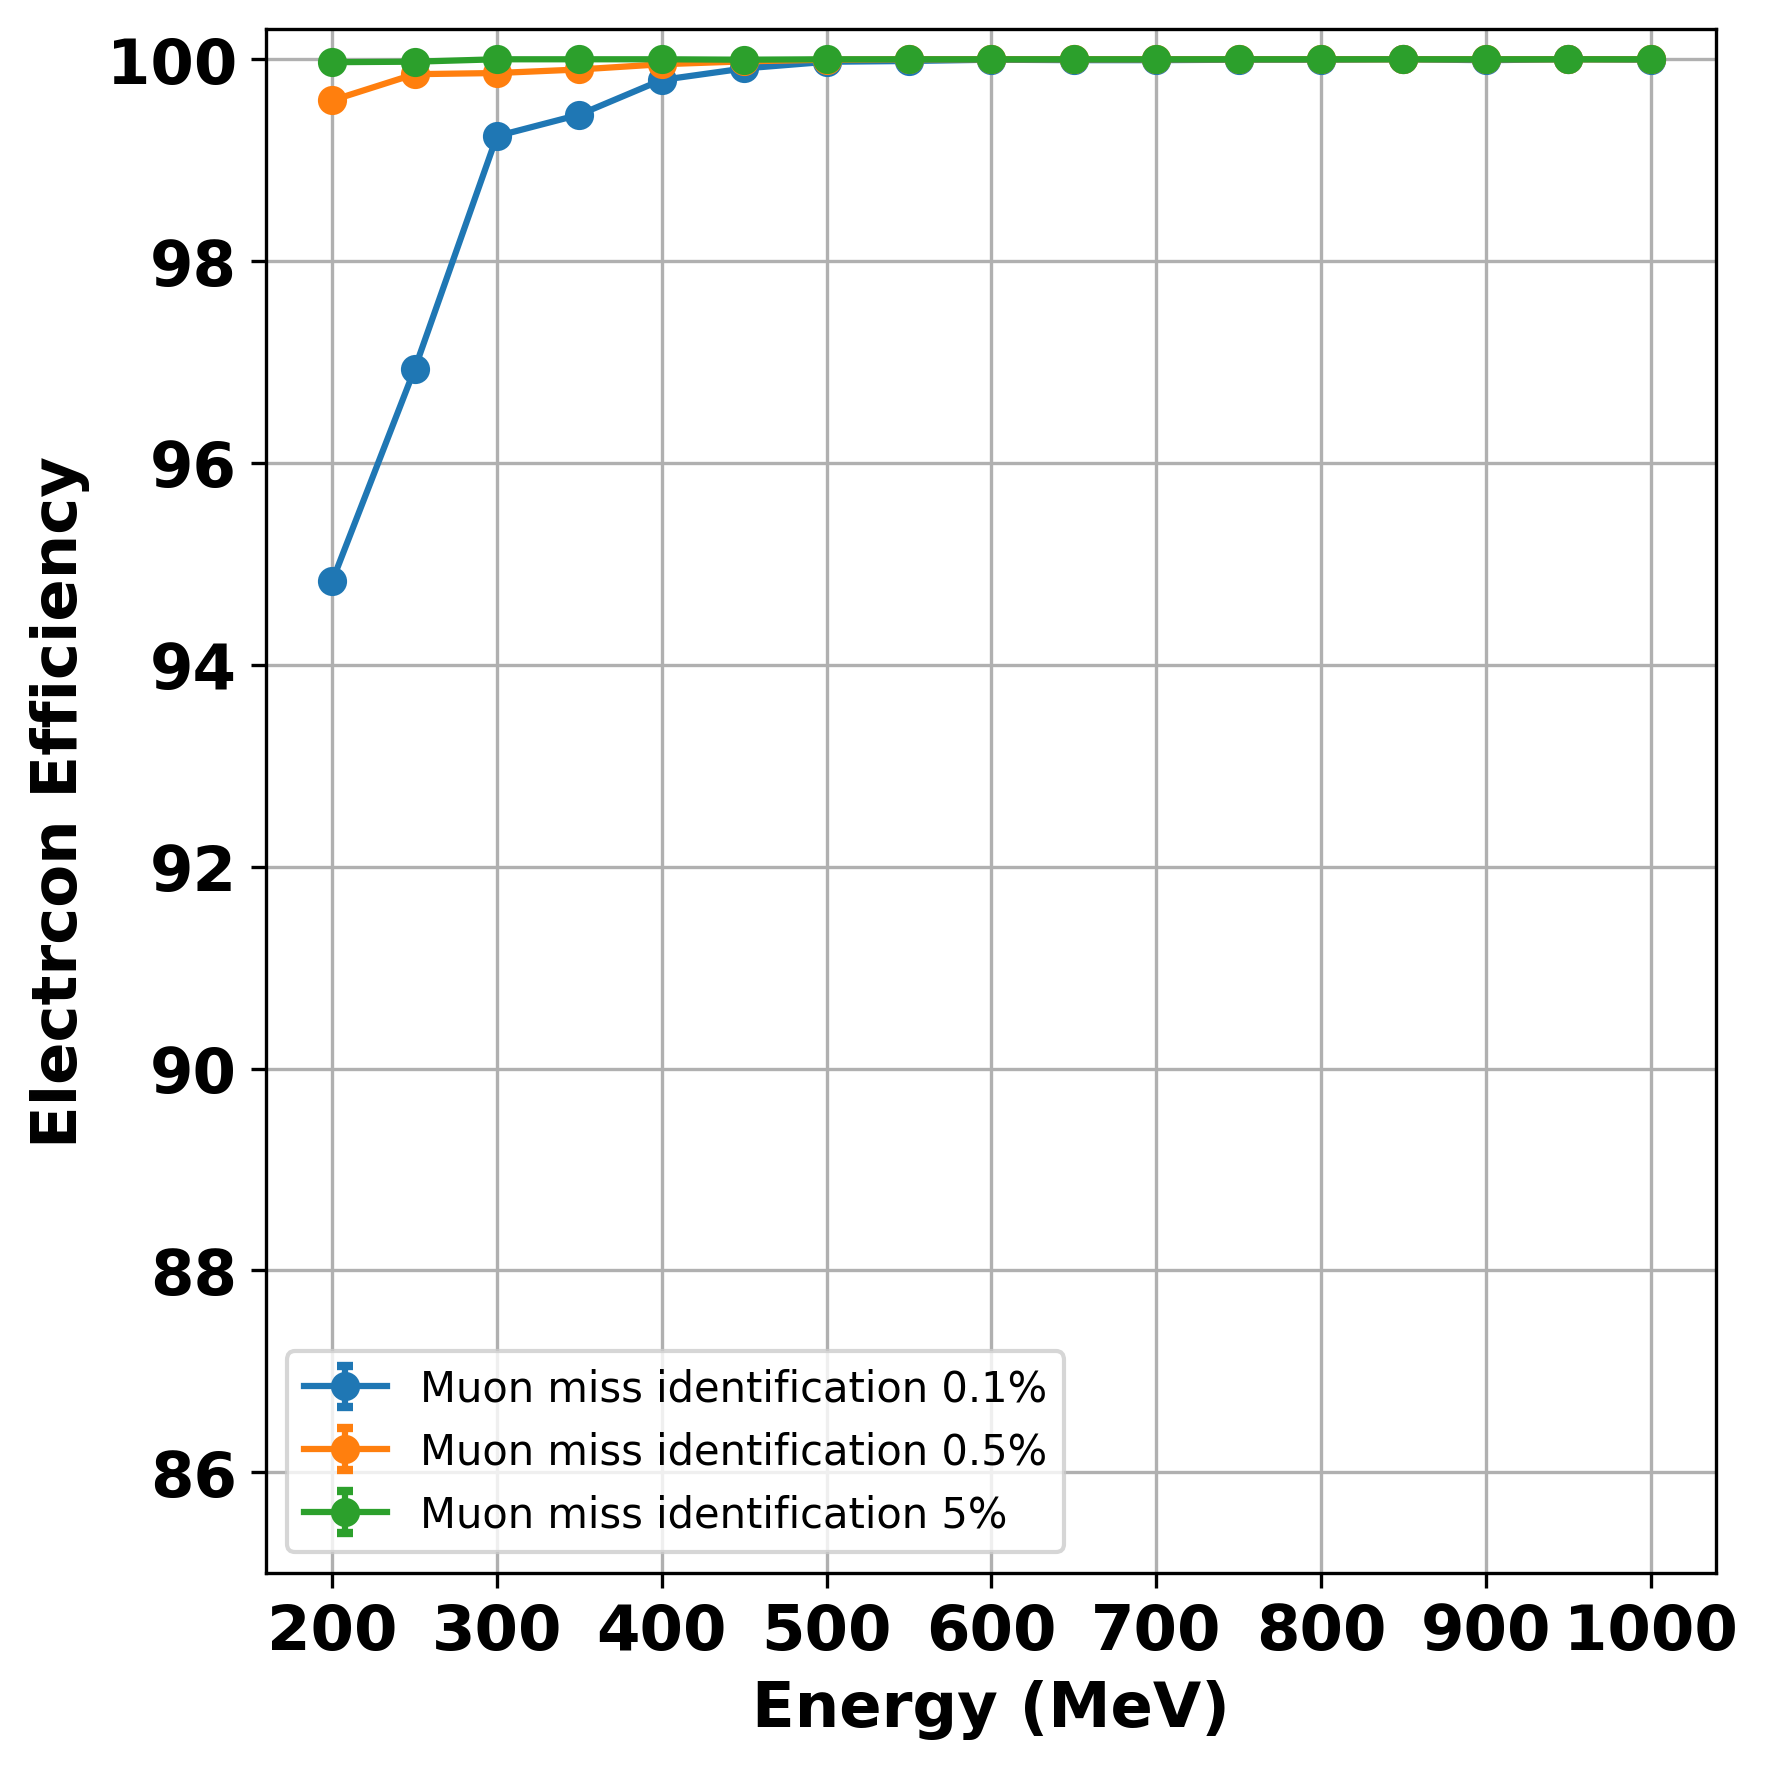

In [15]:
dpi=300
fig_size = (6, 6)


plt.figure(figsize=fig_size,dpi=dpi)
std_error_1 = np.sqrt((np.array(mu_missid_01)/100 * (1 - np.array(mu_missid_01)/100)) / np.array(energy_events)) * 100
std_error_2 = np.sqrt((np.array(mu_missid_05)/100 * (1 - np.array(mu_missid_05)/100)) / np.array(energy_events)) * 100
std_error_3 = np.sqrt((np.array(mu_missid_5)/100 * (1 - np.array(mu_missid_5)/100)) / np.array(energy_events)) * 100


plt.errorbar(np.array(energy_s), np.array(mu_missid_01), yerr=std_error_1, fmt='o-', capsize=2, capthick=2,label='Muon miss identification 0.1%')
plt.errorbar(np.array(energy_s), np.array(mu_missid_05), yerr=std_error_2, fmt='o-', capsize=2, capthick=2,label='Muon miss identification 0.5%')
plt.errorbar(np.array(energy_s), np.array(mu_missid_5), yerr=std_error_3, fmt='o-', capsize=2, capthick=2,label='Muon miss identification 5%')
plt.xlabel("Energy (MeV)",fontsize=15, fontweight='bold')
plt.ylabel("Electrcon Efficiency",fontsize=15, fontweight='bold')
plt.xticks(fontsize = 15, fontweight='bold')
plt.yticks(fontsize = 15, fontweight='bold')
plt.grid()
plt.legend()
plt.tight_layout()
plt.ylim([85,100.3])
plt.savefig("miss_identification.pdf", dpi=dpi, bbox_inches="tight",format="pdf")
plt.show()






In [16]:
for i in range(len(acc_s)):
    print(energy_s[i],'|',acc_s[i],'|',mu_missid_05[i],'|',elec_995[i])

200 | 99.48535690383329 | 99.59255905835872 | 99.55340724005674
250 | 99.73374093979587 | 99.85218919782677 | 99.81326464906633
300 | 99.70775703524552 | 99.86378750851328 | 99.83030138474071
350 | 99.76095617529882 | 99.89911625842379 | 99.87963749645992
400 | 99.83034727398915 | 99.95085391325715 | 99.95167748170648
450 | 99.89745167410142 | 99.9793576087854 | 99.98647186147186
500 | 99.94327850255247 | 99.99584251444726 | 99.97963754836083
550 | 99.95579938119134 | 100.0 | 99.98653470679324
600 | 99.96871986028204 | 100.0 | 99.97986171712425
650 | 99.96321694122592 | 100.0 | 99.97281500611662
700 | 99.97880570126637 | 100.0 | 99.97939135810951
750 | 99.97342051404726 | 100.0 | 99.99313375446306
800 | 99.98115391863878 | 100.0 | 100.0
850 | 99.98647076331953 | 100.0 | 100.0
900 | 99.97548886104907 | 100.0 | 99.99309487639829
950 | 99.98616606258473 | 100.0 | 99.99294681901537
1000 | 99.96672582076309 | 100.0 | 99.99288002847989


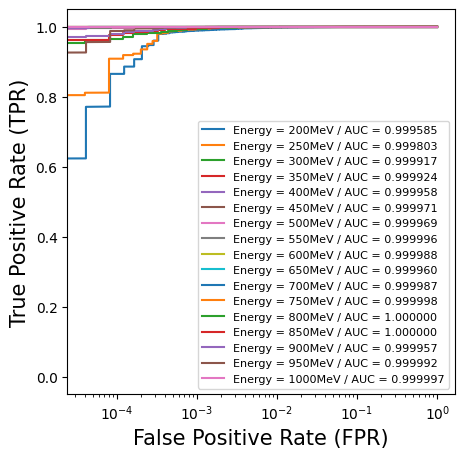

In [19]:
for energy in range(200,1050,50):
    fpr, tpr, thresholds = roc_curve(label[fnames==energy], pred[fnames==energy])
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='Energy = '+str(energy)+'MeV / AUC = '+ f"{auc_score:.6f}")
    plt.xlabel('False Positive Rate (FPR)',fontsize=15)
    plt.ylabel('True Positive Rate (TPR)',fontsize=15)
    # plt.yscale('log')
    plt.xscale('log')
    # plt.legend(loc='best', bbox_to_anchor=(1.85,0.8),fontsize = 9)
    plt.legend(fontsize = 8)
    # plt.show()

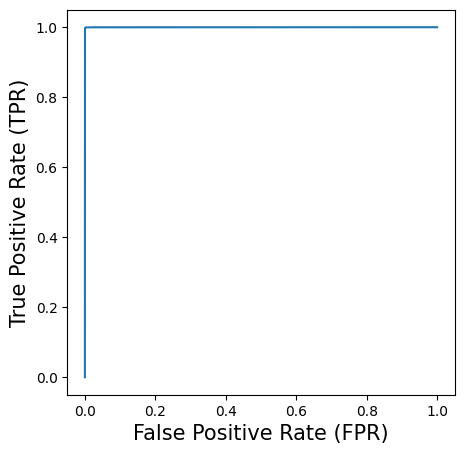

AUC: 0.9999619056839048


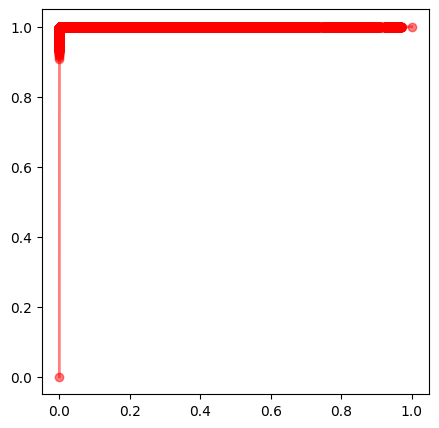

In [24]:


fpr, tpr, thresholds = roc_curve(label, pred)
auc_score = auc(fpr, tpr)
plt.plot(fpr, tpr, label='AUC = '+ f"{auc_score:.6f}")
plt.xlabel('False Positive Rate (FPR)',fontsize=15)
plt.ylabel('True Positive Rate (TPR)',fontsize=15)
# plt.legend()
plt.show()


print('AUC:', auc_score)

plt.plot(fpr, tpr, color='r', linewidth=2, marker='o', alpha=0.5)